In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N=1000
header = ["objid", "ra", "dec", "u", "g", "r", "i", "z", "redshift"]
file_name = ["./galW/cl"+str(i)+".csv" for i in range(1,N+1)]
gal_info = []
for i in range(N):
    temp = pd.read_csv(file_name[i],header=1)
    gal_info.append(temp)
gal_info[327].head()

,objid,ra,dec,u,g,r,i,z,redshift
0,1237662266458898678,217.449688,5.423623,18.85212,16.82902,15.84745,15.39598,15.03655,0.109220
1,1237662266458964241,217.509362,5.367629,20.00122,18.24465,17.30382,16.91543,16.57706,0.110928
2,1237662266458898668,217.433693,5.429551,20.26809,18.42852,17.51070,17.07835,16.75353,0.110676
3,1237662266458898555,217.364108,5.484272,20.74624,18.68554,17.67136,17.23262,16.88381,0.115072
4,1237662266458898645,217.419313,5.396447,19.41356,17.27392,16.22485,15.76839,15.41787,0.112612


In [106]:
cls_info = pd.read_csv('./GalWCls19_summary.csv',index_col=0)
cls_info

,RA (deg),DEC (deg),cluster redshift,radial velocity(km/s),Comoving Distance(Mpc/h),r_200(Mpc/h),N_200,sigma_200(km/s),lower error in sigma_200(km/s),upper error in sigma_200(km/s),"M_200 cls mass (10^14 M_sun, NFW)","error in M_200 cls mass (10^14 M_sun, NFW)",R_s (Mpc/h),error in r_s (Mpc/h),"M_s (10^14 M_sun, NFW)","error in M_s (10^14 M_sun, NFW)"
ID,,,,,,,,,,,,,,,,
1,230.65973,27.743846,0.073177,21137.1930,215.714310,1.758845,167,1042.08600,-83.233978,100.849290,1.350000e+15,3.570000e+14,0.41,0.108,3.060000e+14,8.060000e+13
2,227.55402,33.498096,0.113908,32215.0730,332.547940,1.511349,63,926.75761,-92.042355,118.740250,8.950000e+14,2.350000e+14,0.32,0.084,1.880000e+14,4.930000e+13
3,194.93502,27.912461,0.023372,6924.9620,69.697942,1.544850,672,932.60305,-47.761507,55.312723,8.760000e+14,2.230000e+14,0.33,0.084,1.850000e+14,4.710000e+13
4,258.20851,64.052953,0.080997,23301.8680,238.327350,1.453410,155,881.24884,-70.222098,82.083225,7.700000e+14,2.080000e+14,0.37,0.100,1.860000e+14,5.040000e+13
5,209.83093,27.968947,0.075065,21661.5240,221.182270,1.448992,77,842.65332,-83.231049,96.160155,7.590000e+14,2.170000e+14,0.14,0.040,9.660000e+13,2.760000e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,124.92122,21.032812,0.093382,26693.3160,273.964500,0.689068,10,387.83579,-76.069234,103.545850,8.310000e+13,4.650000e+13,0.05,0.028,9.110000e+12,5.100000e+12
997,134.80258,39.671084,0.027620,8165.9917,82.285446,0.703441,12,449.75002,-251.333430,196.605620,8.300000e+13,3.320000e+13,0.04,0.016,8.110000e+12,3.240000e+12
998,164.50680,1.634841,0.039362,11568.5010,116.952150,0.700718,51,421.30468,-72.371673,106.786410,8.290000e+13,2.330000e+13,0.37,0.104,3.930000e+13,1.100000e+13


In [102]:
print(min(gal_info[1]['u']))
bcg1 = gal_info[1][gal_info[1]['u']==min(gal_info[1]['u'])]
bcg1_rmag = bcg1['r'].values[0]
print(bcg1_rmag)

18.65895
15.673570000000002


In [121]:
bcg_g = []
bcg_r = []
for i in range(N):
    if gal_info[i].size==0:
        print(i)
    bcg = gal_info[i][gal_info[i]['r']==min(gal_info[i]['r'])]
    bcg_r.append(bcg['r'].values[0])

In [131]:
cls_M200 = []
cls_dist = []
dist_list = cls_info['Comoving Distance(Mpc/h)'].values
M200_list = cls_info['M_200 cls mass (10^14 M_sun, NFW)'].values
for i in range(N):
    M200 = math.log10(float(M200_list[i])/math.pow(10,14))
    cls_M200.append(M200)

In [133]:
print(type(bcg_r))
print(type(cls_M200))
print(len(bcg_r))
print(len(cls_M200))
print(cls_dist*0.7)

<class 'list'>
<class 'list'>
1000
1000
[151.000017  232.783558   48.7885594 166.829145  154.827589  161.491092
 180.579231  232.488375  184.546243   77.05614   174.677993  205.372944
 208.378863  280.531062  157.861585  115.013437   63.2509234 251.154792
 177.546005  282.614521  236.441933  193.741177  159.236021  343.057848
 194.914951  194.904332  294.397502  177.176118  184.768864  168.936747
 262.435761   91.946722  147.140826   74.620028  172.937597  212.243353
 149.980831  181.49726   201.271175  176.957081  309.891029  287.868364
  48.4321684 145.951736  211.74643   209.435954  163.145934  148.653365
 227.658767  152.177753  223.037738  167.164263  171.648064  142.130107
 302.860068  202.349119  113.434132  202.08818   176.711808   45.7986396
 157.690372  303.016553  102.423937  383.084254  202.385484  160.600475
 148.12273   185.601871  157.646398  125.985902  373.548686  160.190611
 373.803185  129.987228  236.854772  300.676509  247.547377   85.438892
 228.162144  275.486708

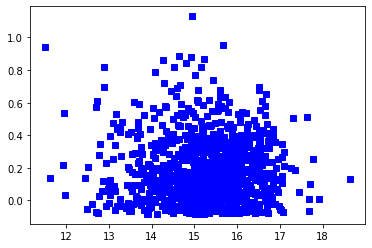

In [129]:
plt.plot(bcg_r, cls_M200,'bs')
plt.show()